In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df = pd.read_csv("/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv")
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [33]:
df.isna().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [34]:
np.random.randn()

0.9778337403946312

In [35]:
my_df = df.sample(frac=0.2,axis='columns')

In [36]:
my_df.corr()

,mfcc8_var,harmony_mean,zero_crossing_rate_mean,mfcc1_mean,mfcc14_var,harmony_var,perceptr_var,mfcc19_mean,mfcc1_var,mfcc18_var,mfcc2_var
mfcc8_var,1.000000,0.033446,0.026433,-0.000127,0.316162,0.104882,0.258428,0.079623,0.364357,0.209749,0.402984
harmony_mean,0.033446,1.000000,0.021418,0.026708,-0.010065,0.070090,0.082072,0.038826,0.003447,-0.016658,0.014140
zero_crossing_rate_mean,0.026433,0.021418,1.000000,0.590236,-0.044698,0.077963,0.395811,-0.058103,-0.151893,-0.013337,-0.032508
mfcc1_mean,-0.000127,0.026708,0.590236,1.000000,-0.200731,0.537311,0.568681,-0.106033,-0.234119,-0.147427,-0.095393
mfcc14_var,0.316162,-0.010065,-0.044698,-0.200731,1.000000,-0.013807,0.021208,0.055541,0.169722,0.415638,0.200846
harmony_var,0.104882,0.070090,0.077963,0.537311,-0.013807,1.000000,0.564842,0.073491,-0.054851,0.006638,0.038700
perceptr_var,0.258428,0.082072,0.395811,0.568681,0.021208,0.564842,1.000000,0.094491,0.100976,0.042719,0.171168
mfcc19_mean,0.079623,0.038826,-0.058103,-0.106033,0.055541,0.073491,0.094491,1.000000,0.092047,0.244033,0.103120
mfcc1_var,0.364357,0.003447,-0.151893,-0.234119,0.169722,-0.054851,0.100976,0.092047,1.000000,0.099405,0.530840
mfcc18_var,0.209749,-0.016658,-0.013337,-0.147427,0.415638,0.006638,0.042719,0.244033,0.099405,1.000000,0.138819


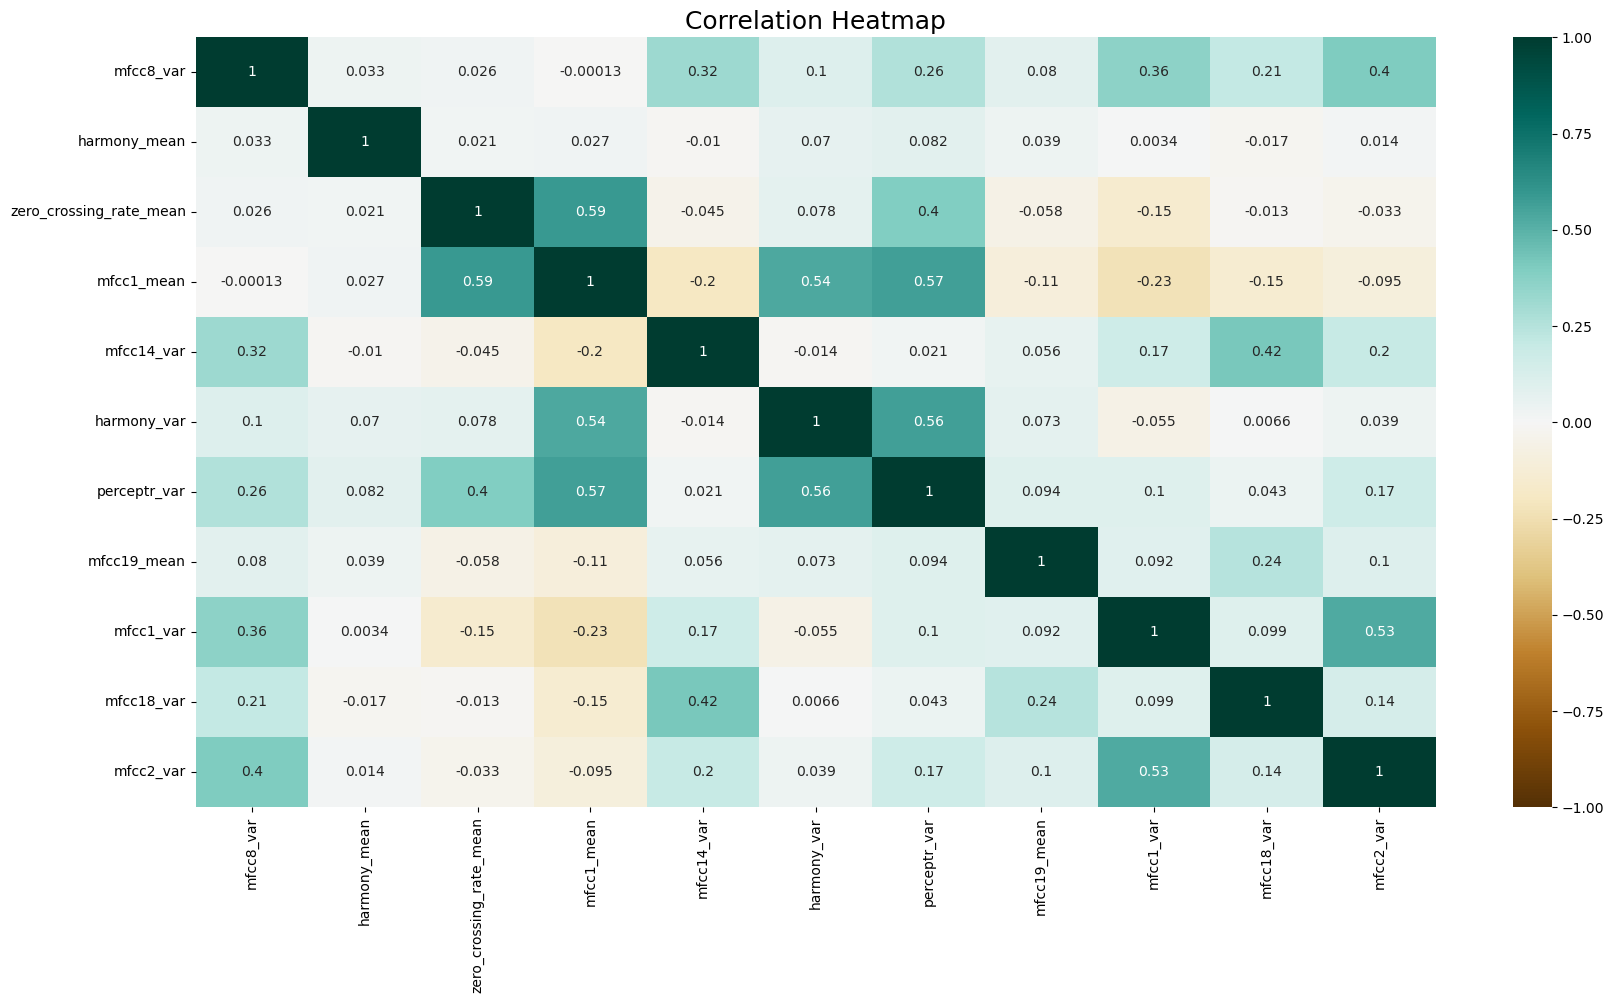

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(my_df.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG',)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':18})
plt.savefig('heatmap.png', dpi=300)

<AxesSubplot:ylabel='harmony_var'>

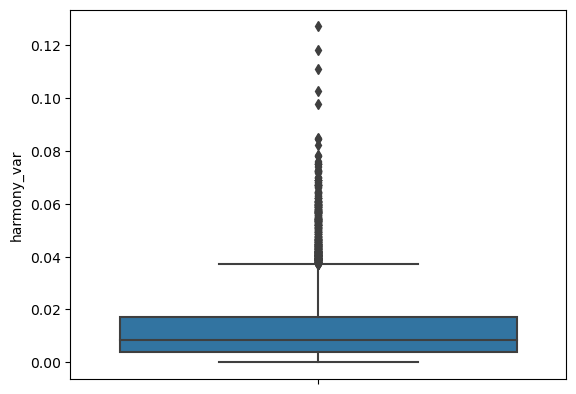

In [38]:
sns.boxplot(y=df['harmony_var'])

In [39]:
max(df['harmony_var'])

0.1270515024662017

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='harmony_var', ylabel='Density'>

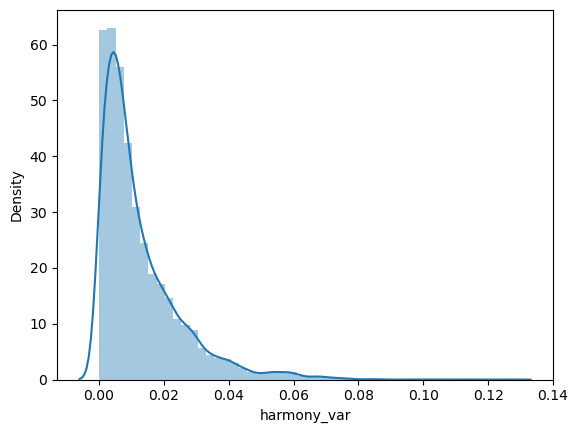

In [40]:
sns.distplot(df['harmony_var'])

In [41]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [42]:
df.size/df.shape[1]

9990.0

In [49]:
import pandas as pd

In [61]:
aa = []
aa = df['label'].value_counts()
aa

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

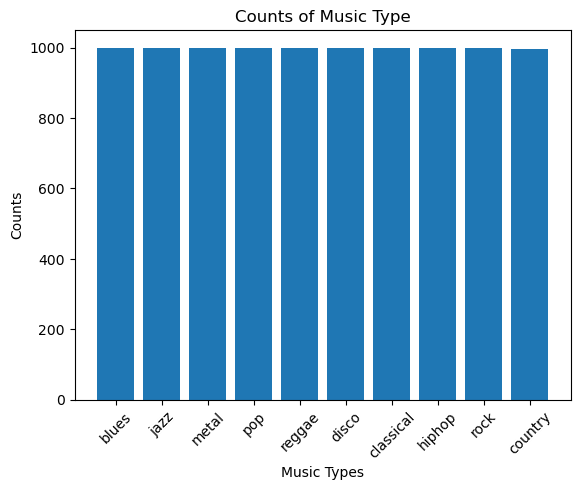

In [65]:
features = ['blues', 'jazz', 'metal','pop', 'reggae', 'disco','classical', 'hiphop', 'rock','country']
count = [1000,1000,1000,1000,1000,999,998,998,998,997]
fig, ax = plt.subplots()
ax.bar(features, aa)

ax.set_xlabel('Music Types')
ax.set_ylabel('Counts')
ax.set_title('Counts of Music Type')
plt.xticks(rotation=45)
plt.show()

In [18]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder 

In [20]:
label2index = dict()
index2label = dict()
for i,unq_label in enumerate(df.label.unique()):
    label2index[unq_label] = i
    index2label[i] = unq_label

In [21]:
label2index

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [22]:
index2label

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [23]:
df.label = [label2index[l] for l in df.label]

In [24]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

In [ ]:
df.info()

In [5]:
df.drop(labels = ['filename','length'], axis=1, inplace = True)

NameError: name 'df' is not defined

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
X.columns

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
df_X = pd.DataFrame(my_scaler.fit_transform(X), columns=X.columns)

In [28]:
# from sklearn.decomposition import PCA 
# pca = PCA(n_components=15)
# principal_components = pca.fit_transform(df_X)
# df_X_PCA = pd.DataFrame(data=principal_components, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])  #PC = Principal Component
# df_X = df_X_PCA

In [29]:
df_X.head(5)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,1.260704,-0.476116,1.666603,1.063938,1.187846,-0.028938,1.598636,-0.198991,1.478089,0.243922,...,0.949079,1.618217,2.327387,2.531849,0.039992,2.462633,0.841672,1.075781,0.266891,-0.455766
1,0.342978,-0.196946,0.767407,1.169592,0.905768,0.437492,0.436826,0.146432,0.812748,-0.084387,...,0.194161,-0.371596,-1.182826,-0.182649,-0.108248,-0.419024,-0.609148,-0.691333,-0.085943,-0.736656
2,-1.148903,-0.207807,-0.422472,-0.617131,0.674272,-0.156863,0.642993,-0.581023,0.783342,-0.669382,...,2.198373,0.035234,-1.433925,-0.653745,0.802749,-0.368188,-1.787241,-0.161797,0.028320,0.697603
3,-0.695875,-1.012322,-1.474107,-0.711905,-0.239278,-0.612324,-0.431251,-0.392175,-0.416199,-0.647584,...,-0.225668,1.618798,1.230643,2.316625,0.288669,0.271956,1.328277,-0.132790,-0.544165,-0.233534
4,-1.457507,0.504914,-0.746581,-0.615693,-0.900303,-0.712224,-1.223885,-0.858630,-0.787127,-0.787737,...,1.504930,3.939201,0.881648,3.629832,-1.215612,0.721392,2.096396,1.475667,-0.610397,2.873283


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(df_X, y, train_size=0.7, stratify = y)

In [31]:
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5,stratify=y_rem)

In [32]:
(X_train.shape,y_train.shape)

((6993, 57), (6993,))

In [33]:
(X_rem.shape,y_rem.shape)

((2997, 57), (2997,))

In [34]:
(X_val.shape,y_val.shape)

((1498, 57), (1498,))

In [35]:
(X_test.shape,y_test.shape)

((1499, 57), (1499,))

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [37]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state = 2)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# print('{}'.format(X_train_smote.shape))
# print('{}'.format(y_train_smote.shape))
# print('{}'.format(len(y_train_smote==0)))
# print('{}'.format(len(y_train_smote==1)))

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from xgboost import XGBClassifier 

In [41]:
# from sklearn.ensemble import BaggingClassifier

In [42]:
# xgb = XGBClassifier(objective='multi: softmax',n_estimators=100, learning_rate=0.05)
# xgb_final = BaggingClassifier(base_estimator = xgb,
#                           n_estimators = 100,
#                           max_samples=0.63, oob_score=True)
# gaussian_NB = GaussianNB()
# gaussian_NB_final = BaggingClassifier(base_estimator = gaussian_NB,
#                           n_estimators = 100,
#                           max_samples=0.63, oob_score=True)
# sgd = SGDClassifier(max_iter=500)
# sgd_final = BaggingClassifier(base_estimator = sgd,
#                           n_estimators = 100,
#                           max_samples=0.63, oob_score=True)
# knn = KNeighborsClassifier(n_neighbors=19)
# knn_final = BaggingClassifier(base_estimator = knn,
#                           n_estimators = 100,
#                           max_samples=0.63, oob_score=True)
# dcgn_tree = DecisionTreeClassifier(max_depth=5)
# dcgn_tree_final = BaggingClassifier(base_estimator = dcgn_tree,
#                           n_estimators = 100,
#                           max_samples=0.63, oob_score=True)
# rforest = RandomForestClassifier(n_estimators=100,max_depth=10)
# rforest_final = BaggingClassifier(base_estimator = rforest,
#                           n_estimators = 100,
#                           max_samples=0.63, oob_score=True)
# xgbrf = XGBRFClassifier()
# xgbrf_final = BaggingClassifier(base_estimator = xgbrf,
#                           n_estimators = 100,
#                           max_samples=0.63, oob_score=True)
# ada = AdaBoostClassifier(base_estimator = rforest,n_estimators=100)
# ada_final = BaggingClassifier(base_estimator = ada,
#                           n_estimators = 100,
#                           max_samples=0.63, oob_score=True)
# gradientboosting = GradientBoostingClassifier()
# gradientboosting_final = BaggingClassifier(base_estimator = gradientboosting,
#                           n_estimators = 100,
#                           max_samples=0.63, oob_score=True)

# beware runnig this code.....

In [46]:
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.828552368245497


In [47]:
xgb_final.fit(X_train,y_train)
y_pred = xgb_final.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8332221480987325


# -----------------------------

In [48]:
# my_list = list()

In [49]:
# my_list = [xgb, gaussian_NB, sgd, knn,dcgn_tree,rforest,xgbrf,ada,gradientboosting]

In [50]:
# def return_list(ayee_list):
#     for i in range(len(ayee_list-1)):
#         return my_list[i]

In [51]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.pipeline import make_pipeline
# pipeline1 = make_pipeline( StandardScaler(),
#                          XGBClassifier(objective='multi: softmax',num_classes=len(df['label']),n_estimators=1000, learning_rate=0.05),
#                             )
# gb_bagging = BaggingClassifier(base_estimator=pipeline1, n_estimators=10, max_samples=0.63, oob_score=True)
#gb_bagging.fit(X_train, y_train)
# y_pred = bagging.predict(X_test)

In [43]:
# from sklearn.ensemble import VotingClassifier
# ensemble_clf = VotingClassifier(estimators=[('xgb', xgb_final), ('gaussian_NB', gaussian_NB_final), ('sgd', sgd_final), ('knn', knn_final),
#                                             ('dcgn_tree', dcgn_tree_final), ('rforest', rforest_final), ('xgbrf', xgbrf_final), ('ada', ada_final),('gradientboosting', gradientboosting_final)], voting='hard')

In [38]:
# # Train the ensemble classifier on the training data
# ensemble_clf.fit(X_train, y_train)

In [ ]:
# y_pred = ensemble_clf.predict(X_test)

In [ ]:
# print(accuracy_score(y_test,y_pred))
# print(precision_score(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))

In [45]:
0.8445

0.8445

# Catboost

In [40]:
# Import necessary libraries
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV

# Define the CatBoost classifier
cat = CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy', verbose=False)

cat.fit(X_train,y_train)
y_pred_cat = cat.predict(X_test)
accuracy_score = accuracy_score(y_test,y_pred_cat)

In [42]:
accuracy_score

0.8985990660440294

In [44]:
# # Define the hyperparameter grid
# params = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [4, 6, 8, 10],
#     'iterations': [100, 500, 1000]
# }

# # Create a grid search object
# grid_search = GridSearchCV(estimator=cat, param_grid=params, cv=3, n_jobs=-1)

# # Fit the grid search object to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

In [49]:
cat_hyp = CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy', verbose=False, iterations= 1000, learning_rate = 0.1,depth = 10)
cat_hyp.fit(X_train,y_train)
y_pred = cat_hyp.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [52]:
y_pred

array([[5],
       [9],
       [2],
       ...,
       [9],
       [0],
       [5]])

In [53]:
acc = accuracy_score(y_test,y_pred)
acc

0.8985990660440294

In [55]:
# cat_hyp = CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy', verbose=False, iterations= 1000, learning_rate = 0.1,depth = 16)
# cat_hyp.fit(X_train,y_train)
# y_pred = cat_hyp.predict(X_test)

In [56]:
# acc = accuracy_score(y_test,y_pred)
# acc

In [58]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [69]:
rforest_normal = RandomForestClassifier()
rforest_normal.fit(X_train,y_train)
y_pred_rforest = rforest_normal.predict(X_test)
acc = accuracy_score(y_test,y_pred_rforest)
acc

0.8599066044029353

In [74]:
# from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

In [75]:
# r_forest_final = BaggingClassifier(base_estimator = rforest,
#                           n_estimators = 10,
#                           max_samples=0.63, oob_score=True)

In [76]:
# r_forest_final.fit(X_train,y_train)
# y_pred_rforest = r_forest_final.predict(X_test)
# acc = accuracy_score(y_test,y_pred_rforest)
# acc

0.7858572381587725

In [92]:
rforest_tuned = RandomForestClassifier(n_estimators=300,max_depth=70,max_features = 'auto',min_samples_leaf = 4,min_samples_split = 10,bootstrap = True)
rforest_tuned.fit(X_train,y_train)
y_pred_rforest = rforest_tuned.predict(X_test)
acc = accuracy_score(y_test,y_pred_rforest)
acc

0.8445630420280187

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

In [86]:
gaussian_NB = GaussianNB()

gaussian_NB_final = BaggingClassifier(base_estimator = gaussian_NB,
                          n_estimators = 10,
                          max_samples=0.63, oob_score=True)
gaussian_NB_final.fit(X_train,y_train)
y_pred_ada = gaussian_NB_final.predict(X_test)
acc = accuracy_score(y_test,y_pred_ada)
acc

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.5290193462308206

In [88]:
sgd = SGDClassifier(max_iter=500)
sgd_final = BaggingClassifier(base_estimator = sgd,
                          n_estimators = 10,
                          max_samples=0.63, oob_score=True)
sgd_final.fit(X_train,y_train)
y_pred_ada = sgd_final.predict(X_test)
acc = accuracy_score(y_test,y_pred_ada)
acc

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.6744496330887259

In [90]:
ada = AdaBoostClassifier(base_estimator = rforest,n_estimators=5)
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
acc = accuracy_score(y_test,y_pred_ada)
acc

0.895263509006004

In [91]:
# ada = AdaBoostClassifier(base_estimator = cat_hyp,n_estimators=5)
# ada.fit(X_train,y_train)
# y_pred_ada = ada.predict(X_test)
# acc = accuracy_score(y_test,y_pred_ada)
# acc

In [94]:
from sklearn.ensemble import VotingClassifier

In [99]:
y_pred.shape

(1499, 1)

In [100]:
voting_clf = VotingClassifier(
    estimators=[('gaussian_NB', gaussian_NB_final), ('SGD', sgd_final), ('r_forest_tuned', rforest_tuned),('ada',ada),('cat',cat)],
    voting='hard'
)

# Train the voting classifier on the training set
voting_clf.fit(X_train, y_train)
final_y_pred = voting_clf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_voting.py:60: VisibleDe

ValueError: could not broadcast input array from shape (1499,1) into shape (1499,)

In [ ]:
acc = accuracy_score(y_test,y_pred)
acc

# RF HP Tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 4)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 60, num = 5)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}
rfc = ske.RandomForestClassifier(random_state=seed, n_jobs=-1)
rfc.fit(X_train_rfe, y_train)

# XGB Model HP Tuning

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=seed)

xgb_params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
# Use the random grid to search for best hyperparameters
xgb_random = skms.RandomizedSearchCV(estimator = xgb_model, param_distributions=xgb_params, n_iter=20, cv = 3, verbose=2, n_jobs = -1, random_state=seed, scoring='f1_weighted', return_train_score=True)
# Fit the random search model
xgb_random.fit(X_train_rfe, y_train)

In [ ]:
# def my_default_model(model):
#     model.fit(X_train,y_train)
#     preds = model.predict(X_test)
#     print(confusion_matrix(y_test,y_pred))
#     print(accuracy_score(y_test,y_pred))

In [ ]:
# my_default_model(xgb)

In [ ]:
# xgb = XGBClassifier()
# my_default_model(xgb)

In [ ]:
# xgbrf = XGBRFClassifier(objective='multi:softmax')
# my_default_model(xgbrf)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a toy dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimator for Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=50)
ada_model = AdaBoostClassifier(n_estimators=3)

# Define the bagging classifier for Gradient Boosting
gb_bagging = BaggingClassifier(base_estimator=gb_model, n_estimators=10, max_samples=0.63, oob_score=True)
cb_bagging = BaggingClassifier(base_estimator=ada_model, n_estimators=10, max_samples=0.63, oob_score=True)

# Train the bagging classifier for Gradient Boosting
gb_bagging.fit(X_train, y_train)
cb.bagging.fit()

# Make predictions on the test set using Gradient Boosting bagging classifier
y_pred_gb = gb_bagging.predict(X_test)

# Compute accuracy score for Gradient Boosting bagging classifier
acc_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting bagging classifier:", acc_gb)

# Define the base estimator for AdaBoost
ab_model = AdaBoostClassifier(n_estimators=50)

# Define the bagging classifier for AdaBoost
ab_bagging = BaggingClassifier(base_estimator=ab_model, n_estimators=10, max_samples=0.63, oob_score=True)

# Train the bagging classifier for AdaBoost
ab_bagging.fit(X_train, y_train)

# Make predictions on the test set using AdaBoost bagging classifier
y_pred_ab = ab_bagging.predict(X_test)

# Compute accuracy score for AdaBoost bagging classifier
acc_ab = accuracy_score(y_test, y_pred_ab)
print("Accuracy of AdaBoost bagging classifier:", acc_ab)


In [ ]:
# explore adaboost ensemble tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()